In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
from datetime import datetime
from scipy.stats import chi2_contingency
from scipy.stats import chi2
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn')

# Setup and Inspection

In [2]:
df = pd.read_csv('life.csv')

In [3]:
df.shape

(2938, 22)

In [4]:
df.Population.count()

2286

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

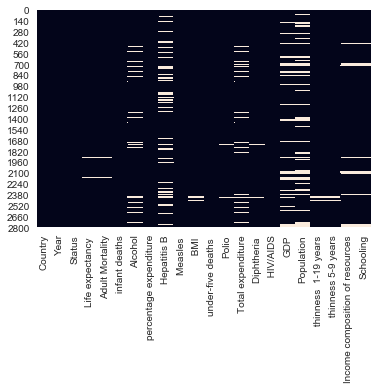

In [6]:
sns.heatmap(df.isna(), cbar=False)

In [7]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

# Dropping and Imputing

In [8]:
df2 = df.drop(columns=[' thinness 5-9 years', 'Hepatitis B', 'infant deaths'])

In [9]:
df2.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Imputing

In [10]:
df2.Population = df.Population.fillna(df.Population.median())

In [11]:
df2.GDP = df.GDP.fillna(df.GDP.median())

In [12]:
df2.Schooling = df.Schooling.fillna(df.Schooling.median())

In [13]:
df2['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].median())

In [14]:
df2['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].median())

In [15]:
df2.Alcohol = df.Alcohol.fillna(df.Alcohol.median())

## Dropping

In [16]:
df2 = df2.dropna(subset =['Life expectancy ',])

In [17]:
df2 = df2.dropna()

In [18]:
df2.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
Income composition of resources    0
Schooling                          0
dtype: int64

In [19]:
corr = df2.corr()

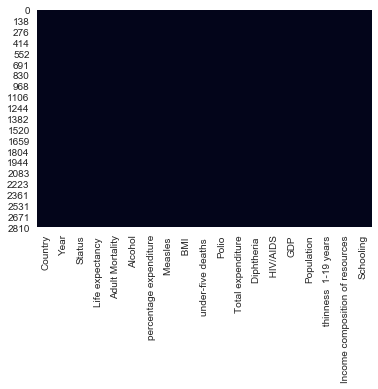

In [20]:
sns.heatmap(df2.isna(), cbar=False)

In [21]:
df2.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
Income composition of resources    0
Schooling                          0
dtype: int64

# EDA and Visuals/Correlations

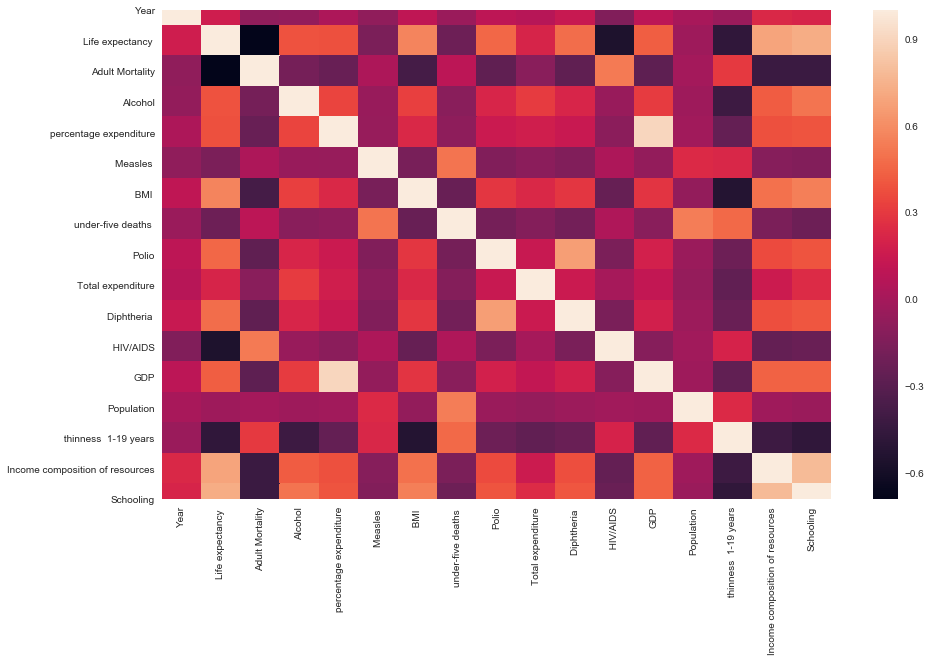

In [22]:
plt.figure(figsize = (15,9))
sns.heatmap(corr)

In [23]:
cols = ['Year', ' BMI ', 'under-five deaths ', \
        'Polio', ' HIV/AIDS', 'GDP', 'Population', \
        'Schooling', ' thinness  1-19 years', \
        'Adult Mortality', 'Life expectancy ', 'Income composition of resources', \
       'Measles ', 'Alcohol']

In [24]:
cols

['Year',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 ' HIV/AIDS',
 'GDP',
 'Population',
 'Schooling',
 ' thinness  1-19 years',
 'Adult Mortality',
 'Life expectancy ',
 'Income composition of resources',
 'Measles ',
 'Alcohol']

In [25]:
n = 4
row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]

In [26]:
df['loglife'] = np.log(df['Life expectancy '])

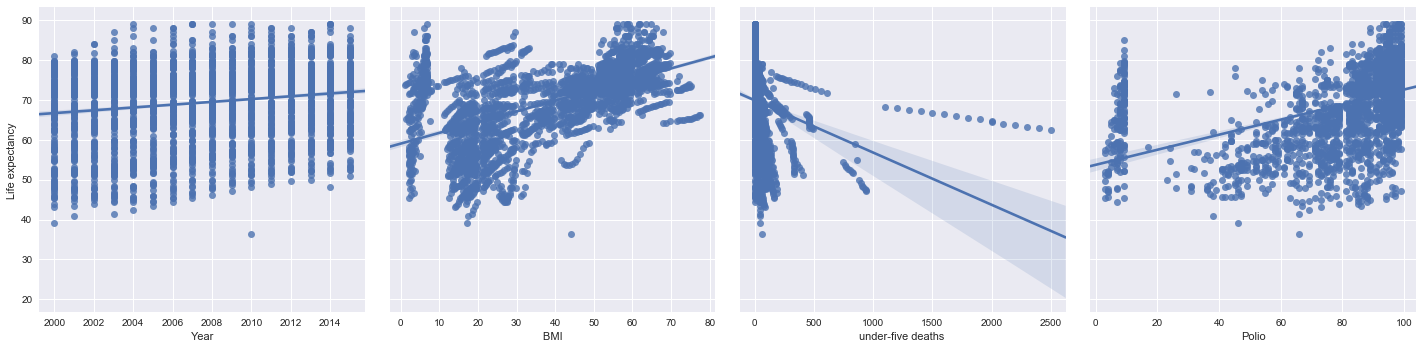

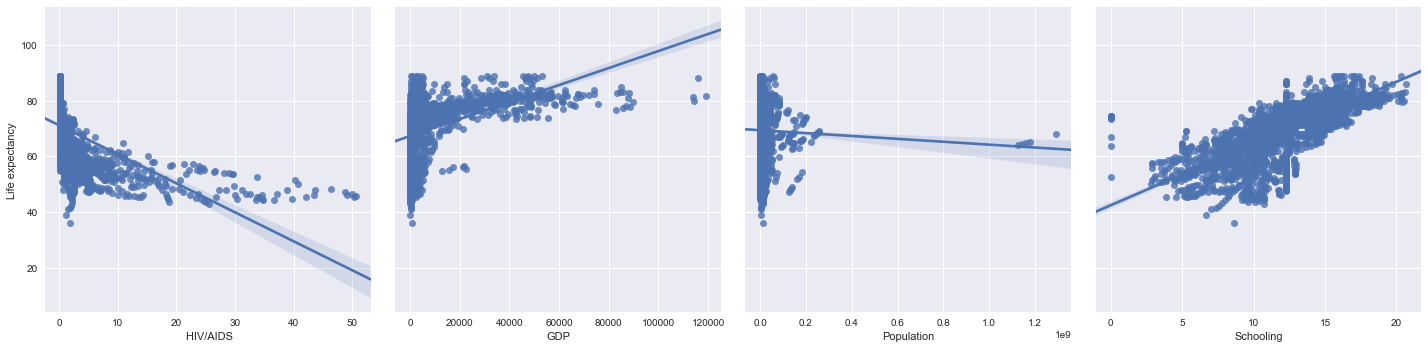

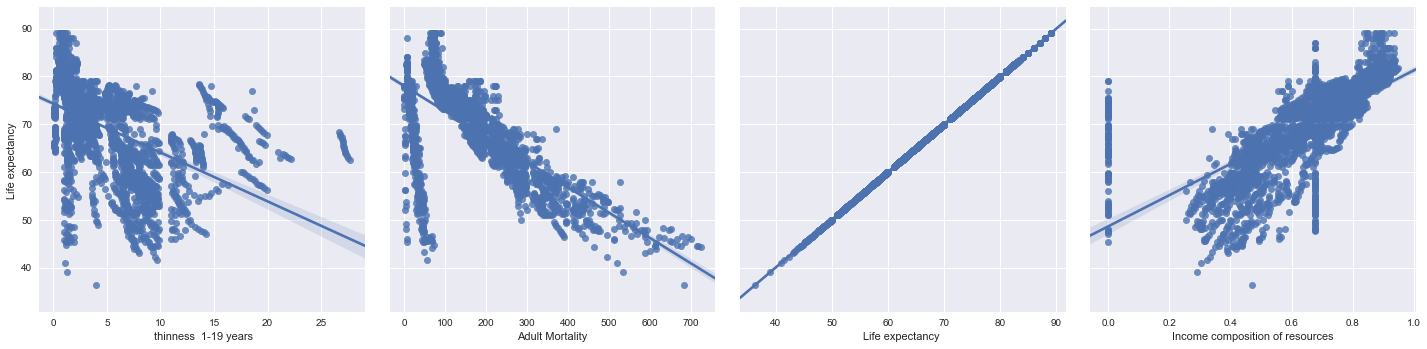

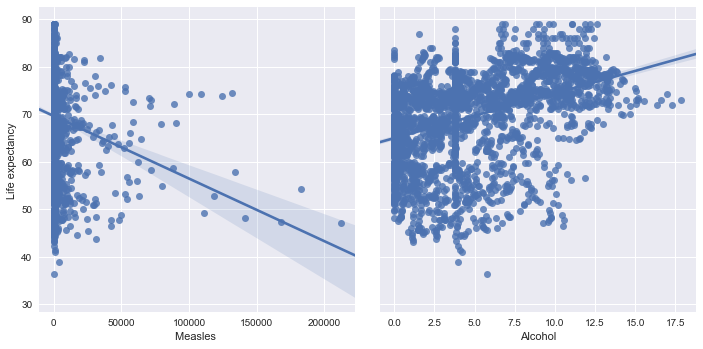

In [27]:
for i in row_groups:
    pp = sns.pairplot(data=df2, y_vars=['Life expectancy '],x_vars=i, kind="reg", height=5)

# ACTUAL SPLIT

In [77]:
features = df2

In [78]:
target = df2['Life expectancy ']

In [79]:
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
df3, hidden20, ignore, y_test = train_test_split(features, target, random_state=0,test_size=0.2)

In [80]:
print("Training set - Features: ", df3.shape, "Target: ", ignore.shape)
print("Training set - Features: ", hidden20.shape, "Target: ",y_test.shape)

Training set - Features:  (2310, 19) Target:  (2310,)
Training set - Features:  (578, 19) Target:  (578,)


In [84]:
df3.head(200)

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
1399,Kuwait,2010,Developing,74.0,86.0,0.010,2009.575605,13,68.4,1,98.0,2.760,98.0,0.1,38497.616960,1.386542e+06,3.3,0.790,13.5
1997,Paraguay,2009,Developing,73.0,155.0,5.390,30.935195,0,45.6,3,81.0,9.140,85.0,0.1,2599.596259,6.127837e+06,2.1,0.663,12.1
1044,Grenada,2013,Developing,73.3,144.0,8.250,780.445928,0,46.5,0,98.0,6.150,97.0,0.1,7955.615985,1.386542e+06,3.8,0.746,15.8
893,Ethiopia,2004,Developing,55.0,354.0,0.860,1.506962,73,13.5,342,54.0,4.230,4.0,4.1,135.762386,7.462445e+06,11.5,0.310,5.4
2381,Somalia,2011,Developing,53.1,329.0,0.010,0.000000,17298,22.4,82,49.0,5.755,41.0,0.8,1766.947595,1.386542e+06,6.9,0.677,12.3
2086,Qatar,2000,Developing,76.2,88.0,0.500,1559.287158,46,62.4,0,91.0,2.180,8.0,0.1,29986.291500,1.386542e+06,4.8,0.808,13.0
314,Bolivia (Plurinational State of),2005,Developing,65.7,222.0,2.860,0.000000,0,46.0,16,84.0,5.670,85.0,0.2,1766.947595,1.386542e+06,1.3,0.622,14.4
1241,Iraq,2008,Developing,69.3,167.0,0.170,192.156300,5494,54.5,38,71.0,3.930,69.0,0.1,4521.324700,2.911142e+07,5.4,0.638,10.3
37,Algeria,2010,Developing,74.7,119.0,0.450,430.717586,103,53.9,24,95.0,5.120,95.0,0.1,4463.394675,3.611764e+07,5.9,0.714,13.6
425,Burundi,2006,Developing,54.1,361.0,4.500,21.249153,784,14.5,36,88.0,11.490,92.0,3.8,165.879418,7.675338e+06,8.1,0.290,5.9


In [83]:
pd.get_dummies(df3.Country).head(200)

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Cyprus,Czechia,Côte d'Ivoire,Democratic People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Micronesia (Federated States of),Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Romania,Russian Federation,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav republic of Macedonia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
1399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1044,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [76]:
hidden20

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
1159,Hungary,2010,Developed,74.5,156.0,10.780,19.220240,0,61.7,1,99.0,7.850,99.0,0.1,1325.533790,123.0,1.8,0.817,15.3
1764,Mozambique,2015,Developing,57.6,355.0,3.755,0.000000,79,22.6,81,8.0,5.755,8.0,3.9,528.312560,281691.0,3.6,0.414,9.1
2170,Saint Lucia,2013,Developing,74.8,141.0,9.730,0.000000,0,45.9,0,99.0,7.850,99.0,0.1,1766.947595,1386542.0,4.3,0.734,13.1
298,Bhutan,2005,Developing,65.0,254.0,0.730,145.596544,11,16.7,1,95.0,5.280,95.0,0.3,1247.613920,656639.0,17.8,0.000,9.2
488,Cameroon,2007,Developing,53.6,395.0,5.440,7.562893,100,24.4,89,81.0,4.760,82.0,7.0,111.711860,18395389.0,6.6,0.456,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,Malta,2008,Developed,80.0,64.0,7.140,2655.573684,1,66.6,0,72.0,8.150,72.0,0.1,21928.767000,49379.0,0.7,0.813,14.6
597,Comoros,2010,Developing,61.8,246.0,0.150,47.304219,0,21.6,2,82.0,5.820,74.0,0.1,769.174288,689692.0,7.1,0.476,10.5
2253,Senegal,2011,Developing,64.9,26.0,0.320,1.431052,18,22.2,31,89.0,4.420,92.0,0.4,18.253210,13391.0,1.2,0.455,7.9
1539,Luxembourg,2014,Developed,81.7,65.0,11.120,16255.161980,0,6.9,0,99.0,6.940,99.0,0.1,119172.741800,556319.0,1.0,0.892,13.9


# Model Building